In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression

Below, we have a simple dataset dealing with mammalian sleep time.  

```
This is an updated and expanded version of the mammals sleep dataset. Updated sleep times and weights were taken from V. M. Savage and G. B. West. A quantitative, theoretical framework for understanding mammalian sleep. Proceedings of the National Academy of Sciences, 104 (3):1051-1056, 2007.
```

Let's use this to examine the relationship between brain and bodyweight in these critters.

In [2]:
critters = pd.read_csv('data/mammals.csv', index_col = 0)

In [3]:
critters.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


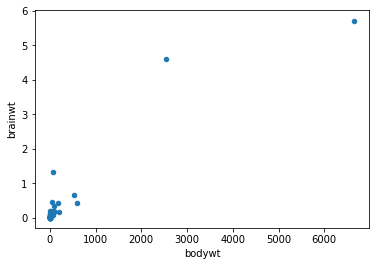

In [5]:
critters.plot('bodywt', 'brainwt', kind = 'scatter')

(array([52.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.400000e-04, 5.713260e-01, 1.142512e+00, 1.713698e+00,
        2.284884e+00, 2.856070e+00, 3.427256e+00, 3.998442e+00,
        4.569628e+00, 5.140814e+00, 5.712000e+00]),
 <a list of 10 Patch objects>)

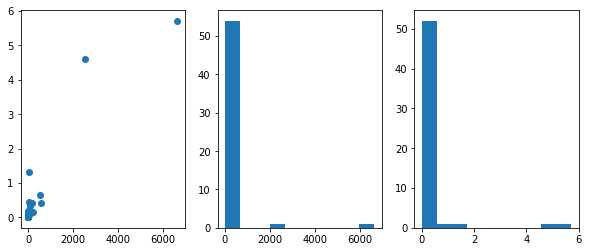

In [6]:
plt.figure(figsize = (10, 4))
plt.subplot(131)

plt.scatter(critters.bodywt, critters.brainwt)
plt.subplot(132)
plt.hist(critters.bodywt)

plt.subplot(133)
plt.hist(critters.brainwt)

In [7]:
critters['log_bodywt'] = np.log(critters.bodywt)
critters['log_brainwt'] = np.log(critters.brainwt)

(array([ 6.,  2.,  7.,  8., 12.,  4.,  9.,  5.,  1.,  2.]),
 array([-8.87386814, -7.8122244 , -6.75058066, -5.68893693, -4.62729319,
        -3.56564946, -2.50400572, -1.44236198, -0.38071825,  0.68092549,
         1.74256923]),
 <a list of 10 Patch objects>)

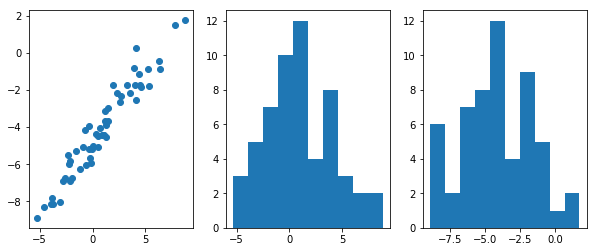

In [8]:
plt.figure(figsize = (10, 4))
plt.subplot(131)

plt.scatter(critters.log_bodywt, critters.log_brainwt)
plt.subplot(132)
plt.hist(critters.log_bodywt)

plt.subplot(133)
plt.hist(critters.log_brainwt)

### Similar Model

Use the code below as a starting place to examine additional correlations between the dependent variables `sleep_rem` and `awake`.


In [10]:
log_columns = ['bodywt', 'brainwt','sleep_rem', 'awake']  # add other relationships in need of transformation
log_critters = critters.copy()
log_critters[log_columns] = log_critters[log_columns].apply(np.log10)

In [11]:
critters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 82
Data columns (total 13 columns):
name            56 non-null object
genus           56 non-null object
vore            51 non-null object
order           56 non-null object
conservation    36 non-null object
sleep_total     56 non-null float64
sleep_rem       48 non-null float64
sleep_cycle     30 non-null float64
awake           56 non-null float64
brainwt         56 non-null float64
bodywt          56 non-null float64
log_bodywt      56 non-null float64
log_brainwt     56 non-null float64
dtypes: float64(8), object(5)
memory usage: 8.6+ KB


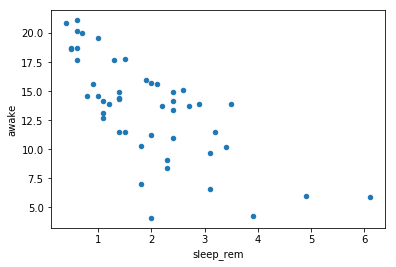

In [15]:
critters.plot('sleep_rem', 'awake', kind = 'scatter')

In [17]:
critters = critters.dropna()

(array([5., 2., 1., 2., 2., 3., 3., 1., 0., 1.]),
 array([0.6 , 1.03, 1.46, 1.89, 2.32, 2.75, 3.18, 3.61, 4.04, 4.47, 4.9 ]),
 <a list of 10 Patch objects>)

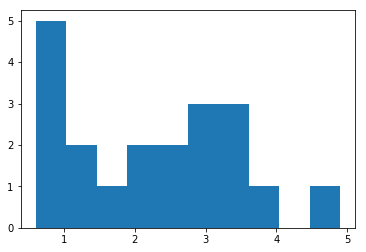

In [18]:
plt.hist(critters.sleep_rem)

In [19]:
log_columns = ['bodywt', 'brainwt','sleep_rem', 'awake']  # add other relationships in need of transformation
log_critters = critters.copy()
log_critters[log_columns] = log_critters[log_columns].apply(np.log10)

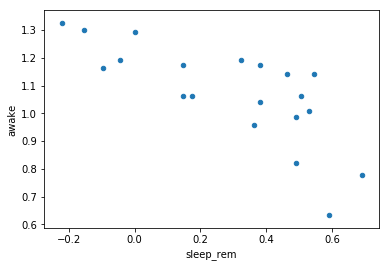

In [20]:
log_critters.plot('sleep_rem', 'awake', kind = 'scatter')

(array([2., 2., 1., 0., 3., 1., 3., 4., 3., 1.]),
 array([-0.22184875, -0.13064427, -0.03943978,  0.0517647 ,  0.14296918,
         0.23417367,  0.32537815,  0.41658263,  0.50778711,  0.5989916 ,
         0.69019608]),
 <a list of 10 Patch objects>)

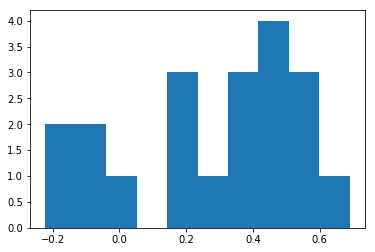

In [21]:
plt.hist(log_critters.sleep_rem)

### SciKitLearn Example



In [22]:
from sklearn import feature_selection


lm = LinearRegression()
X = critters.log_bodywt.values.reshape(-1,1)
y = critters.log_brainwt
lm.fit(X, y)

pvals = feature_selection.f_regression(X, y)[1]
predictions = lm.predict(X)
coefficients = lm.coef_
y_int = lm.intercept_
r2 = lm.score(X, y)
print('P-Values: ',pvals)
print('Coefficients: ', coefficients)
print('Intercept: ', y_int)
print('R2 Score: ', r2)

P-Values:  [5.81867221e-15]
Coefficients:  [0.70604083]
Intercept:  -5.0593949533633324
R2 Score:  0.9684556562664695


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R2 Score: 0.9685
RMSE: 5.2114
Residual Skew:  0   -1.086958
dtype: float64 
Pvalues :  [5.81867221e-15]


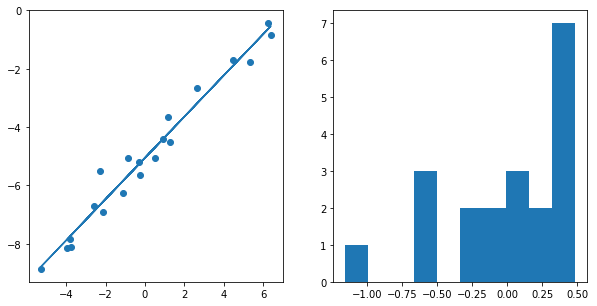

In [23]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.scatter(critters.log_bodywt, critters.log_brainwt)
plt.plot(critters.log_bodywt, predictions)

plt.subplot(122)
plt.hist(predictions - critters.log_brainwt)
print('R2 Score: {:.4f}'.format(lm.score(X, y)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(X, y))))
skew = pd.DataFrame([i for i in (predictions - critters.log_brainwt)]).skew()
print('Residual Skew: ', skew, '\nPvalues : ',pvals)

### Modularizing the Evaluation


In [27]:
def get_linear_model_metrics(X, y, algo):
    pvals = feature_selection.f_regression(X, y)[1]
    algo.fit(X, y)
    predictions = algo.predict(X)
    coefficients = algo.coef_
    y_int = algo.intercept_
    r2 = algo.score(X, y)
    residuals = (y - predictions)
    print('P-Values: ',pvals)
    print('Coefficients: ', coefficients)
    print('Intercept: ', y_int)
    print('R2 Score: ', r2)
    plt.hist(residuals)
    return algo

P-Values:  [5.81867221e-15]
Coefficients:  [0.70604083]
Intercept:  -5.0593949533633324
R2 Score:  0.9684556562664695


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

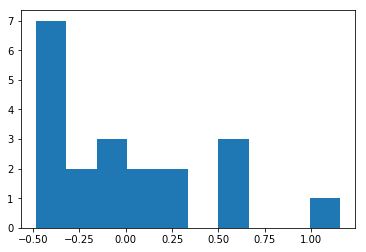

In [28]:
lm = LinearRegression()
get_linear_model_metrics(X = X, y = y, algo = lm)









### Intercept

In [26]:
lm.predict(0)

array([-5.05939495])

In [29]:
lm = LinearRegression(fit_intercept=False)
X = critters.log_bodywt.values.reshape(-1,1)
y = critters.log_brainwt
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [30]:
lm.predict(0)

array([0.])

R2 Score: -3.3423
RMSE: 5.2114
Residual Skew:  0   -1.086958
dtype: float64


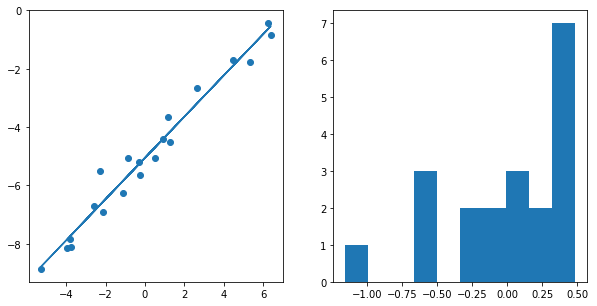

In [33]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.scatter(critters.log_bodywt, critters.log_brainwt)
plt.plot(critters.log_bodywt, predictions)

plt.subplot(122)
plt.hist(predictions - critters.log_brainwt)
print('R2 Score: {:.4f}'.format(lm.score(X, y)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(X, y))))
skew = pd.DataFrame([i for i in (predictions - critters.log_brainwt)]).skew()
print('Residual Skew: ', skew)

### Using `LinearRegression`

We have now seen that the data in its earliest state did not allow fo the best linear regression fit.  Attempt to generate two more models using the log-transformed data to see how this changes the model's performance.  Update X and y to match the log-transformed data and add True and False to the loop so we examine each scenario.

y-intercept: True
P-Values:  [1.75893488e-05]
Coefficients:  [1.00280053]
Intercept:  -1.6665711805104912
R2 Score:  0.6501852799095109

y-intercept: False
P-Values:  [1.75893488e-05]
Coefficients:  [0.31440803]
Intercept:  0.0
R2 Score:  0.3299559230103468



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


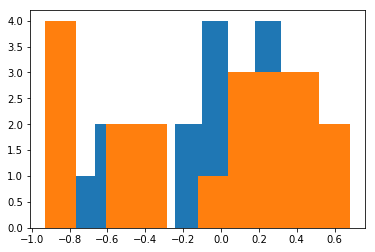

In [35]:
X = np.log(critters.sleep_total).reshape(-1,1)
y = np.log(critters.sleep_rem)
loop = [True, False]
for boolean in loop:
    print( 'y-intercept:', boolean)
    lm = LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print()

### Base Regression Classes

Compare the earlier model to implementations of the `Lasso, Ridge` and `ElasticNet` regularized models.  

In [37]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [38]:
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

P-Values:  [1.75893488e-05]
Coefficients:  [0.]
Intercept:  0.6562802408598044
R2 Score:  0.0


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

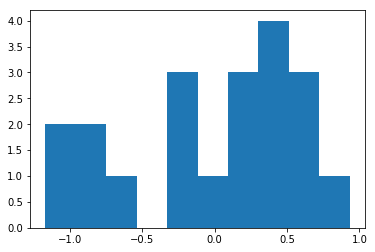

In [42]:
get_linear_model_metrics(X, y, lasso)

P-Values:  [1.75893488e-05]
Coefficients:  [0.83125448]
Intercept:  -1.2692080241453652
R2 Score:  0.6311583173621546


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

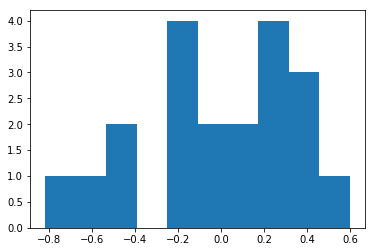

In [43]:
get_linear_model_metrics(X, y, ridge)

P-Values:  [1.75893488e-05]
Coefficients:  [0.]
Intercept:  0.6562802408598044
R2 Score:  0.0


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

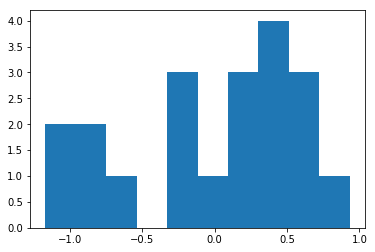

In [44]:
get_linear_model_metrics(X, y, enet)

### CitiBike Example

In [45]:
bikes = pd.read_csv('data/bikeshare.csv')

In [46]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
from pandas.plotting import scatter_matrix
import seaborn as sns

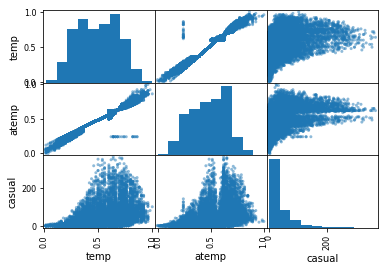

In [48]:
scatter_matrix(bikes[['temp', 'atemp', 'casual']]);

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000


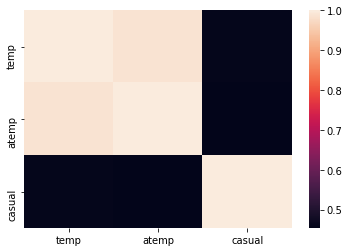

In [49]:
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print(correlations)
sns.heatmap(correlations)

In [50]:
y = bikes['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

In [51]:
for x in x_sets:
    lm.fit(bikes[x], y)
    print('Score for ', x, '{:.3f}'.format(lm.score(bikes[x], y)), '\ncoefficients', lm.coef_, '\n')  

Score for  ['temp'] 0.183 
coefficients [77.7759093] 

Score for  ['atemp'] 0.173 
coefficients [81.36647969] 

Score for  ['temp', 'atemp'] 0.189 
coefficients [ 193.59735771 -122.24947894] 



Even though the 2-variable model temp + atemp has a higher explanation of variance than two variables on their own, and both variables are considered significant (p values approaching 0), we can see that together, their coefficients are wildly different. This can introduce error in how we explain models.

What happens if we use a second variable that isn't highly correlated with temperature, like humidity?

### Multicollinearity with dummy variables


There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

Run through the following code on your own. What happens to the coefficients when you include all weather situations instead of just including all except one?

In [59]:
lm = LinearRegression()
weather = pd.get_dummies(bikes.weathersit, prefix='weather_')
weather.head()

,weather__1,weather__2,weather__3,weather__4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [60]:
bikes = bikes.join(weather)

In [61]:
bikes.head()
X = bikes[['season', 'weather_1', 'weather_2']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
predictions = 
mean_squared_error(y_test, predictions)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,weather__1,weather__2,weather__3,weather__4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,1,0,0,0


In [56]:
lm.fit(weather, y)
print(lm.score(weather, y))
print(lm.coef_)

0.023349865121625624
[4.05237297e+12 4.05237297e+12 4.05237297e+12 4.05237297e+12]


In [57]:
lm.fit(weather[[1, 2, 3]], y)
print(lm.score(weather[[1, 2, 3]], y))
print(lm.coef_)

KeyError: '[1 2 3] not in index'

### Problem

1. Add the dummy variables for the weather situations to the DataFrame.  
2. Find at least two additional features that are not correlated with current features but could be strong indicators for predicting guest riders.
3. Fit a model to these features, describe the results.

---

**Extra**

Generate your model using a `train_test_split`, and evaluate it on the test set.

Do this five times and determine the quality of the average of these models.

---